Skrypt opisuje przykład zastosowania Local Outlier Factor do wykrywania obserwacji odstających

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('creditcard.csv')

In [9]:
#standaryzuję wartości czasu oraz kwot, zawsze tak musimy postąpić korzystając z metod opartych na odległości

df_norm = df.copy()
# Zmieniamy kształt danych wejściowych, korzystamy z array.reshape(-1, 1) dla pojedynczej zmiennej
# lub array.reshape(1, -1) jeżeli posiadamy pojedynczą próbkę.
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))


X = df_norm.drop('Class',axis = 1) # X is input
y = df_norm['Class'] # y is output

fraud = df[df['Class'] == 1] # Number of fraudulent transactions
valid = df[df['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

0.0017304750013189597


In [10]:
LOF = LocalOutlierFactor(n_neighbors = 50, contamination = 0.002) # trochę podrasuję outlier_fraction
# trenujemy model
y_prediction1 = LOF.fit_predict(X)
# mapujemy wynik zwrócony przez model: prawidłowa transakcja oznaczona jest przez 0, fraud przez 1  
y_prediction1[y_prediction1 == 1] = 0 
y_prediction1[y_prediction1 == -1] = 1 
# suma błędów modelu
errors1 = (y_prediction1 != y).sum() 
print(errors1)
print(accuracy_score(y_prediction1,y))
print(classification_report(y_prediction1,y))

1046
0.9963273374601046
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284237
           1       0.02      0.01      0.02       570

    accuracy                           1.00    284807
   macro avg       0.51      0.51      0.51    284807
weighted avg       1.00      1.00      1.00    284807



In [17]:
import seaborn as sns
from pylab import rcParams
TEST_PCT = 0.2 

#ustawienia stylu grafik, w tym wypadku wykorzystałem schemat kolorów z xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # złoty podział
col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
sns.set(style='white', font_scale=1.75)
sns.set_palette(sns.xkcd_palette(col_list))

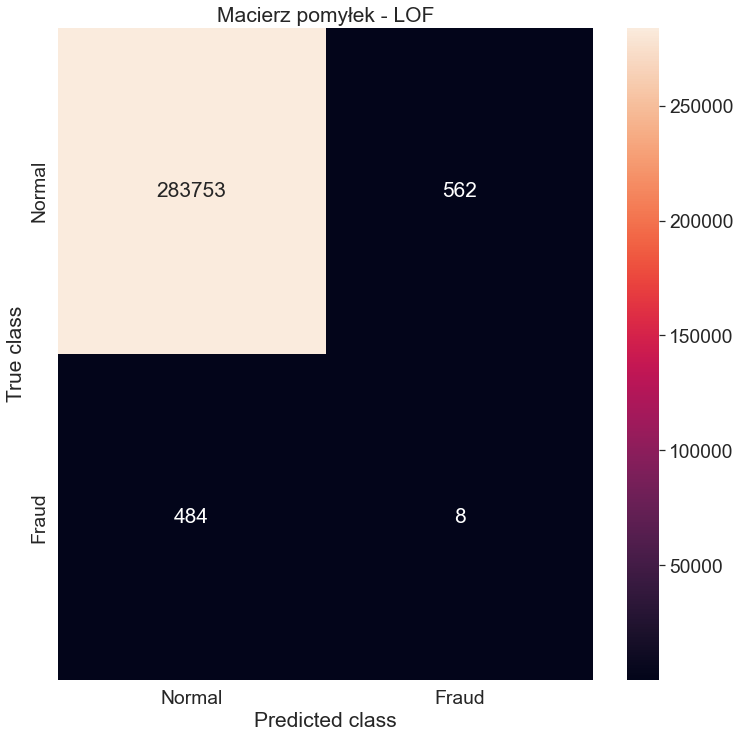

In [18]:

conf_matrix = confusion_matrix(y, y_prediction1)
LABELS = ["Normal","Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Macierz pomyłek - LOF")
plt.ylabel('True class')
plt.xlabel('Predicted class')
#plt.savefig(r"E:\page_ds\anomaly_detection\foto\5_Conf_matrics_autoenc.png", format="png" , dpi=300, facecolor="White")
plt.show()

In [ ]:
Recall = 2%... pozostawię bez komentarza... 

#### Isolation Forest

In [19]:
IFo = IsolationForest(max_samples = len(X),contamination = 0.002).fit(X) # Fitting the model.
y_prediction2 = IFo.predict(X) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors2 = (y_prediction2 != y).sum() # Total number of errors is calculated.
print(errors2)
print(accuracy_score(y_prediction2,y))
print(classification_report(y_prediction2,y))

E:\Python\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


710
0.9975070837444304
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284237
           1       0.36      0.31      0.33       570

    accuracy                           1.00    284807
   macro avg       0.68      0.65      0.67    284807
weighted avg       1.00      1.00      1.00    284807



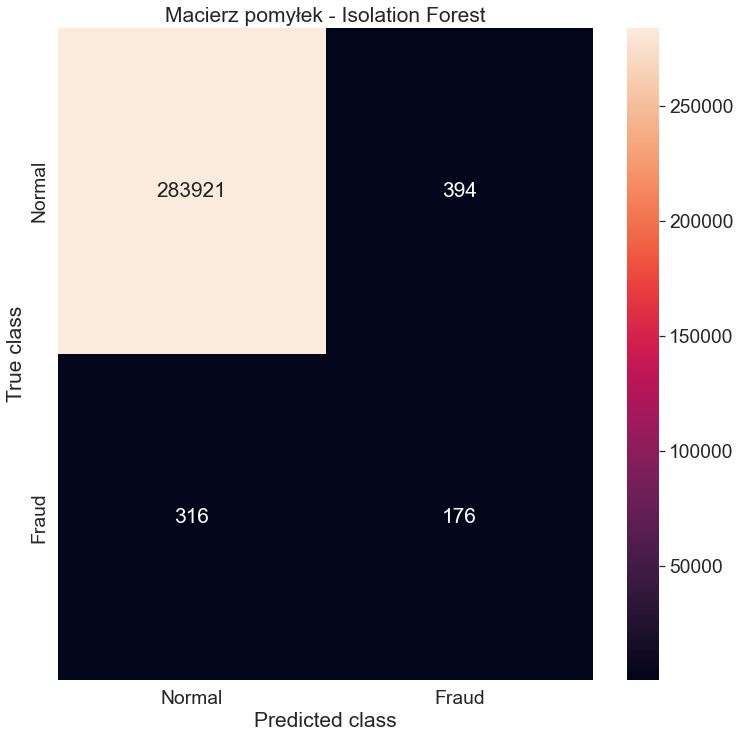

In [20]:
conf_matrix2 = confusion_matrix(y, y_prediction2)
LABELS = ["Normal","Fraud"]

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix2, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Macierz pomyłek - Isolation Forest")
plt.ylabel('True class')
plt.xlabel('Predicted class')
#plt.savefig(r"E:\page_ds\anomaly_detection\foto\5_Conf_matrics_autoenc.png", format="png" , dpi=300, facecolor="White")
plt.show()